In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_dog_breed_zip = '/content/drive/MyDrive/nessma.zip'


import zipfile

# Unzip the train images
with zipfile.ZipFile(file_dog_breed_zip, 'r') as zip_ref:
    zip_ref.extractall("/content/dog-breed")

Mounted at /content/drive


In [3]:
train_img_path = '/content/dog-breed/train/'


In [4]:
labels_old=pd.read_csv('/content/dog-breed/labels.csv')
labels_old.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [5]:
train_labels=labels_old.assign(train_img_path=lambda x: train_img_path + x['id'] +'.jpg')
train_labels.head()

id             breed  \
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull   
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo   
2  001cdf01b096e06d78e9e5112d419397          pekinese   
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick   
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever   

                                      train_img_path  
0  /content/dog-breed/train/000bec180eb18c7604dce...  
1  /content/dog-breed/train/001513dfcb2ffafc82ccc...  
2  /content/dog-breed/train/001cdf01b096e06d78e9e...  
3  /content/dog-breed/train/00214f311d5d2247d5dfe...  
4  /content/dog-breed/train/0021f9ceb3235effd7fcd...

In [6]:
y_train = labels_old['breed']
y_train

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [7]:
X_train = train_labels['train_img_path']
X_train

0        /content/dog-breed/train/000bec180eb18c7604dce...
1        /content/dog-breed/train/001513dfcb2ffafc82ccc...
2        /content/dog-breed/train/001cdf01b096e06d78e9e...
3        /content/dog-breed/train/00214f311d5d2247d5dfe...
4        /content/dog-breed/train/0021f9ceb3235effd7fcd...
                               ...                        
10217    /content/dog-breed/train/ffd25009d635cfd16e793...
10218    /content/dog-breed/train/ffd3f636f7f379c51ba36...
10219    /content/dog-breed/train/ffe2ca6c940cddfee68fa...
10220    /content/dog-breed/train/ffe5f6d8e2bff356e9482...
10221    /content/dog-breed/train/fff43b07992508bc822f3...
Name: train_img_path, Length: 10222, dtype: object

In [8]:
import random

# shuffle X and y
combined = list(zip(X_train, y_train))
random.shuffle(combined)

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Step 1: First split off 10% for test set
X_temp, X_test1, y_temp, y_test1 = train_test_split(
    X_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)

# Step 2: Now split remaining 90% into train (80%) and val (10%)
# 10% of 90% = 0.1 / 0.9 ≈ 0.111
X_tr1, X_val1, y_tr1, y_val1 = train_test_split(
    X_temp, y_temp, test_size=0.111, stratify=y_temp, random_state=42
)

# Step 3: Build DataFrames
df_train1 = pd.DataFrame({'filename': X_tr1, 'class': y_tr1})
df_val1  = pd.DataFrame({'filename': X_val1, 'class': y_val1})
df_test1  = pd.DataFrame({'filename': X_test1, 'class': y_test1})


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

val_generator1 = datagen.flow_from_dataframe(


    dataframe=df_val1,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
train_generator1 = datagen.flow_from_dataframe(


    dataframe=df_train1,
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 1022 validated image filenames belonging to 120 classes.
Found 8177 validated image filenames belonging to 120 classes.


In [11]:
# Create dataframe with only filenames

# Create generator without labels
test_generator1 = datagen.flow_from_dataframe(
    dataframe=df_test1,
    x_col='filename',
    class_mode=None,              # No labels
    target_size=(224, 224),
    batch_size=32,
    shuffle=False                 # Keep order if needed
)

Found 1023 validated image filenames.


In [53]:
from tensorflow.keras import backend as K
K.clear_session()


In [54]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

### TODO: Define your architecture.

#model.add(Lambda(lambda x: (x/127.5) - 0.5))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# input for following code found here: https://keras.io/getting-started/sequential-model-guide/
# improved model accuracy dramatically
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(120, activation='softmax'))

### Defining the summary of the model.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        61,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,535,544 (196.59 MB)

 Trainable params: 51,535,544 (196.59 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Callback 1: Sauvegarde du meilleur modèle
checkpoint = ModelCheckpoint(
    "best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

# Callback 2: Early stopping
earlystop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Callback 3: Réduction du learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_lr=1e-6
)


In [56]:

# Entraînement avec callbacks
rom tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# Early Stopping
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10);

# Model Checkpoint
checkpoint_filepath = './Checkpoints/modelcnn.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

history = model.fit(
    train_generator1,
    validation_data=val_generator1,
    steps_per_epoch=len(train_generator1)//batch_size,
    validation_steps=len(val_generator1)//batch_size,
    epochs=30,
    callbacks=[model_checkpoint_callback, earlystopping]
)


NameError: name 'checkpoint' is not defined

In [13]:
from tensorflow.keras.applications import ResNet50V2

resnet50_v2 = ResNet50V2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'  # optional, depending on whether you want pretrained weights
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [14]:
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import ResNet50V2

# Load base model
resnet50_v2 = ResNet50V2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)

def build_resnet_model(model_name='ResNet50V2', print_summary=True):
    # Freeze all base model layers
    for layer in resnet50_v2.layers:
        layer.trainable = False

    # Input layer
    model_input = resnet50_v2.input

    # Extract last layer from base model
    hidden = resnet50_v2.output

    # Flatten + classification head
    hidden = layers.Flatten()(hidden)
    output = layers.Dense(units=120, activation='softmax')(hidden)  # adjust units as needed

    # Final model
    model = Model(inputs=model_input, outputs=output, name=model_name)

    # Print summary if needed
    if print_summary:
        model.summary()

    return model


In [16]:
############################
# Training Params
############################
batch_size = 32
epochs = 50
############################
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

# Early Stopping
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10);

# Model Checkpoint
checkpoint_filepath = './Checkpoints/model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

# Build the model
model1 = build_resnet_model()

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "ResNet50V2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 35,607,160 (135.83 MB)

 Trainable params: 12,042,360 (45.94 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [17]:


# Train model

training_results1 = model1.fit(
        train_generator1,
        validation_data=val_generator1,
        epochs=50,
        callbacks=[earlystopping,model_checkpoint_callback],
        verbose=1,
        )




/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3357 - loss: 24.4114
Epoch 1: val_accuracy improved from -inf to 0.57436, saving model to ./Checkpoints/model.keras
256/256 ━━━━━━━━━━━━━━━━━━━━ 57s 166ms/step - accuracy: 0.3361 - loss: 24.4077 - val_accuracy: 0.5744 - val_loss: 23.4437
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8767 - loss: 4.1042
Epoch 2: val_accuracy did not improve from 0.57436
256/256 ━━━━━━━━━━━━━━━━━━━━ 29s 113ms/step - accuracy: 0.8767 - loss: 4.1029 - val_accuracy: 0.5744 - val_loss: 25.0550
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9473 - loss: 1.5261
Epoch 3: val_accuracy improved from 0.57436 to 0.58708, saving model to ./Checkpoints/model.keras
256/256 ━━━━━━━━━━━━━━━━━━━━ 28s 108ms/step - accuracy: 0.9472 - loss: 1.5269 - val_accuracy: 0.5871 - val_loss: 27.6059
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9582 - loss: 1.1237
Epoch 4: val_accuracy did not improve from

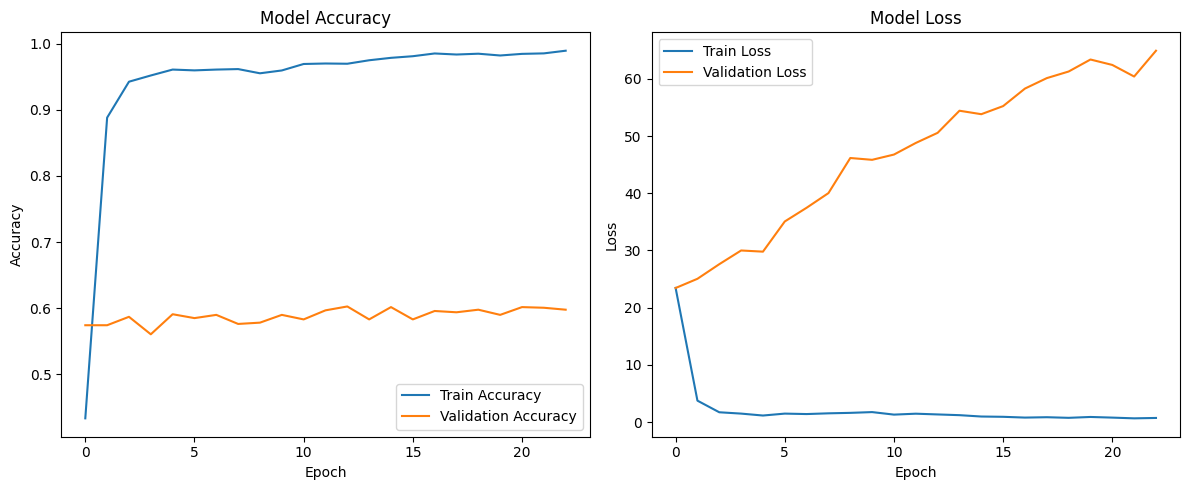

In [19]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_results1.history['accuracy'], label='Train Accuracy')
plt.plot(training_results1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(training_results1.history['loss'], label='Train Loss')
plt.plot(training_results1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step


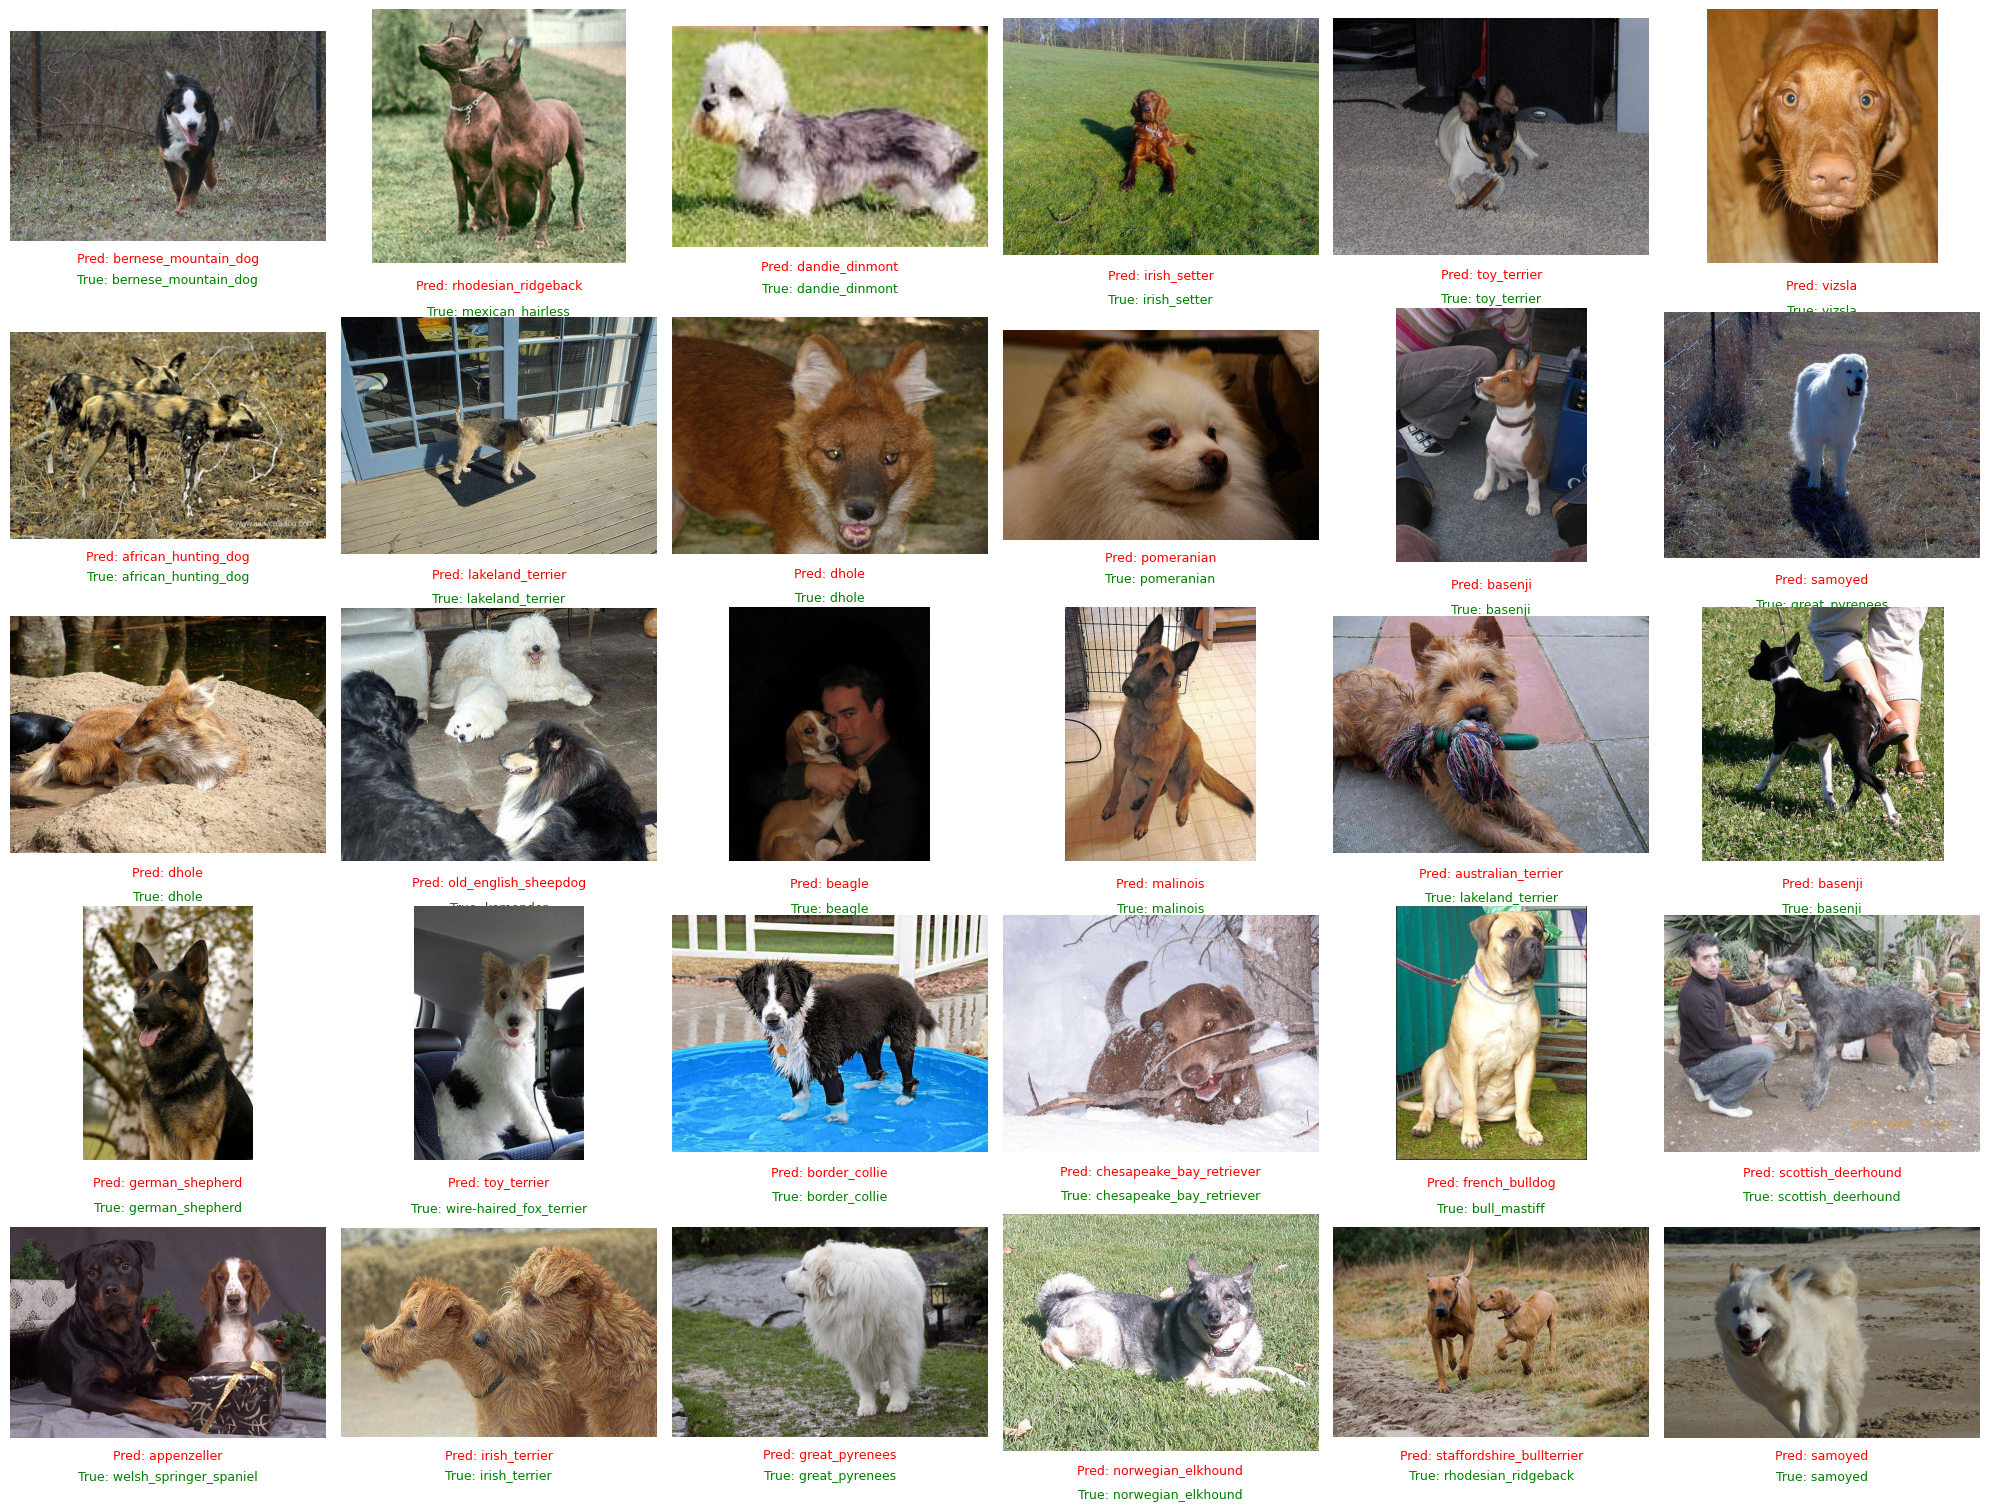

In [28]:




import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Inverser le dictionnaire class_indices
class_indices = {v: k for k, v in train_generator1.class_indices.items()}
predictions = model1.predict(test_generator1, verbose=1)  # shape: (num_samples, 120)
true_classes = df_test1['class'].values

# Prédictions (assure-toi que 'predictions' est défini, par ex. via model.predict())
predicted_classes = np.argmax(predictions, axis=1)
image_paths = df_test1['filename'].tolist()

# Affichage des 30 premières images avec leurs prédictions
plt.figure(figsize=(20, 15))
for i in range(30):
    img = mpimg.imread(image_paths[i])
    pred_label = class_indices[predicted_classes[i]]
    true_label = true_classes[i]

    ax = plt.subplot(5, 6, i + 1)
    ax.imshow(img)
    ax.axis('off')

    ax.text(0.5, -0.1, f"Pred: {pred_label}", color='red', fontsize=9, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.2, f"True: {true_label}", color='green', fontsize=9, ha='center', transform=ax.transAxes)


plt.tight_layout()
plt.show()


In [48]:
# Fonction de conversion de classe en indice
def get_class_index(class_name):
    # Recherche de l'indice dans class_indices
    return {v: k for k, v in class_indices.items()}.get(class_name, None)  # Retourne None si non trouvé

# Appliquer cette fonction à chaque ligne
df_test1['class_index'] = df_test1['class'].apply(get_class_index)

In [52]:

# Vraies classes (assure-toi qu'elles sont sous forme d'indices numériques)
true_classes = df_test1['class_index']

# Prédictions (convertir les probabilités en classes)
predicted_classes = np.argmax(predictions, axis=1)

# Afficher le rapport de classification
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=list(class_indices.values())))


                                precision    recall  f1-score   support

                 affenpinscher       0.54      0.88      0.67         8
                  afghan_hound       0.44      1.00      0.62        12
           african_hunting_dog       1.00      0.89      0.94         9
                      airedale       0.50      0.73      0.59        11
american_staffordshire_terrier       0.00      0.00      0.00         7
                   appenzeller       0.33      0.50      0.40         8
            australian_terrier       0.41      0.70      0.52        10
                       basenji       0.42      0.73      0.53        11
                        basset       0.67      0.75      0.71         8
                        beagle       0.83      0.45      0.59        11
            bedlington_terrier       0.58      0.78      0.67         9
          bernese_mountain_dog       0.91      0.91      0.91        11
       black-and-tan_coonhound       0.56      0.62      0.59  